In [2]:
import pandas as pd

In [14]:
titanic = pd.read_csv(r'D:\Rishabh\coding\machine learning\TitanicSurvival\train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### dropping null values in "Embarked" 

In [23]:
titanic.dropna(subset=['Embarked'], inplace=True)

### imputing values in "Age"

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

titanic_numeric = titanic.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
imputer.fit(titanic_numeric)


SimpleImputer()

In [27]:
X = imputer.transform(titanic_numeric)

In [46]:
titanic_num_tr = pd.DataFrame(X, columns=titanic_numeric.columns)
titanic_num_tr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [30]:
titanic_categorical = titanic.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
titanic_categorical.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### Imputing categorical values 

In [32]:
titanic_categorical['Cabin'].fillna('unknown', inplace=True)
titanic_categorical.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,unknown,S


### Adjsuting categorical columns

In [33]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

titanic_categorical_1hot = one_hot_encoder.fit_transform(titanic_categorical)
titanic_categorical_1hot

<889x1721 sparse matrix of type '<class 'numpy.float64'>'
	with 4445 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

titanic_categorical_encoded = ordinal_encoder.fit_transform(titanic_categorical)
titanic_categorical_encoded

array([[108.,   1., 522., 146.,   2.],
       [190.,   0., 595.,  80.,   0.],
       [353.,   0., 668., 146.,   2.],
       ...,
       [412.,   0., 674., 146.,   2.],
       [ 81.,   1.,   8.,  59.,   0.],
       [220.,   1., 465., 146.,   1.]])

### handling outliers

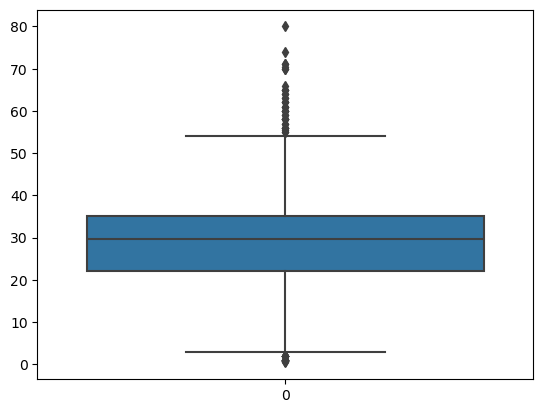

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(titanic_num_tr['Age'])
plt.show()

In [48]:
q1=titanic_num_tr["Age"].quantile(0.25)
q3=titanic_num_tr["Age"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

titanic_num_tr.loc[titanic_num_tr["Age"]>ul, "Age"]=ul

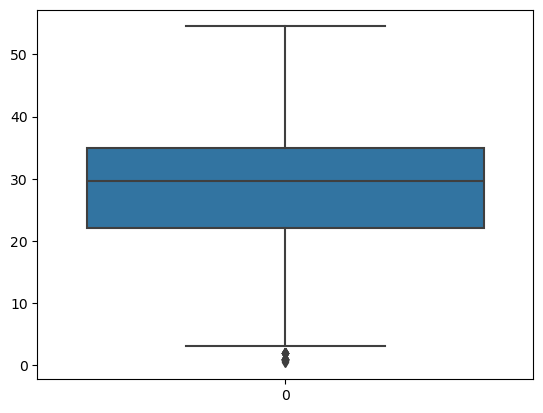

In [49]:
sns.boxplot(titanic_num_tr['Age'])
plt.show()

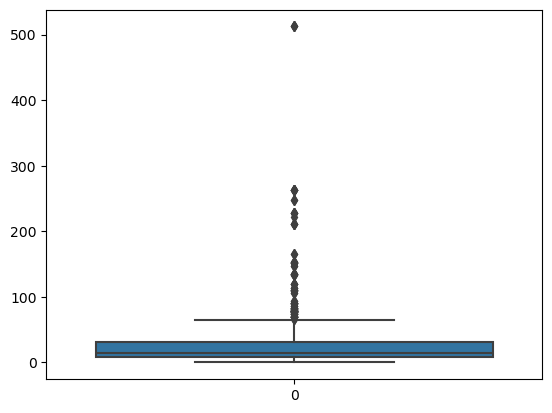

In [51]:
sns.boxplot(titanic_num_tr['Fare'])
plt.show()

In [52]:
q1=titanic_num_tr["Fare"].quantile(0.25)
q3=titanic_num_tr["Fare"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

titanic_num_tr.loc[titanic_num_tr["Fare"]>ul, "Fare"]=ul

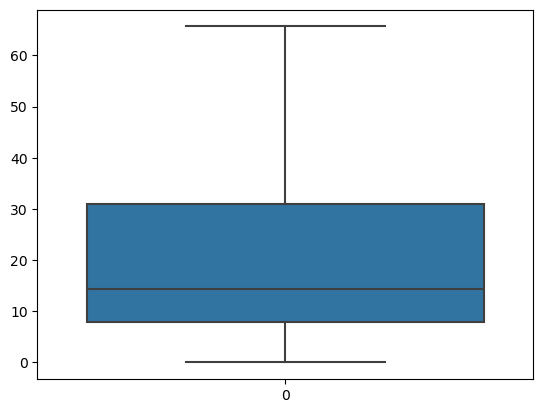

In [53]:
sns.boxplot(titanic_num_tr['Fare'])
plt.show()

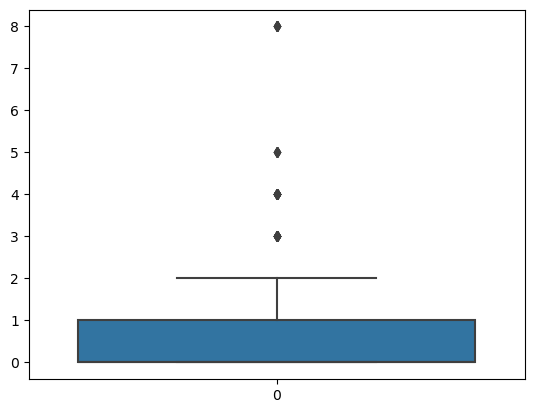

In [55]:
sns.boxplot(titanic_num_tr['SibSp'])
plt.show()

In [56]:
q1=titanic_num_tr["SibSp"].quantile(0.25)
q3=titanic_num_tr["SibSp"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

titanic_num_tr.loc[titanic_num_tr["SibSp"]>ul, "SibSp"]=ul

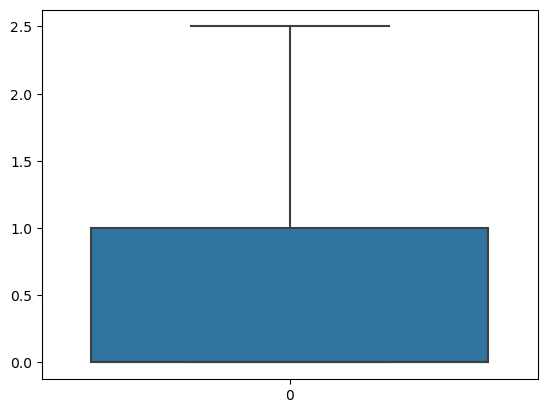

In [57]:
sns.boxplot(titanic_num_tr['SibSp'])
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
titanic_num_tr_scaled = std_scaler.fit_transform(titanic_num_tr)

In [64]:
titanic_combined = pd.concat([titanic_num_tr, titanic_categorical], axis=1)
titanic_combined.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,unknown,S
1,2.0,1.0,1.0,38.0,1.0,0.0,65.6563,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,unknown,S
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,unknown,S


In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

titanic_combined['Sex'] = label_encoder.fit_transform(titanic_combined['Sex'])
titanic_combined['Ticket'] = label_encoder.fit_transform(titanic_combined['Ticket'])
titanic_combined['Cabin'] = label_encoder.fit_transform(titanic_combined['Cabin'])
titanic_combined['Embarked'] = label_encoder.fit_transform(titanic_combined['Embarked'])